# Car Price Prediction Model

## Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

## Data Collection and Preprocessing


In [ ]:
# Import data from a csv file to a pandas dataframe
car_data = pd.read_csv('/content/car data.csv')

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.shape

(301, 9)

In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
car_data.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [ ]:
car_data.Seller_Type.value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [ ]:
car_data.Transmission.value_counts()

,count
Transmission,
Manual,261
Automatic,40


In [ ]:
car_data.Owner.value_counts()

,count
Owner,
0,290
1,10
3,1


In [ ]:
car_data.replace({
    'Fuel_Type':{
        'Petrol':0,
        'Diesel':1,
        'CNG':2
    }
}, inplace = True)

<ipython-input-15-2b043049486a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({


In [ ]:
car_data.replace({
    'Seller_Type':{
        'Dealer':0,
        'Individual':1
    }
}, inplace = True)

<ipython-input-17-2505e18599d7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({


In [ ]:
car_data.replace({
    'Transmission':{
        'Automatic':0,
        'Manual':1
    }
}, inplace = True)

<ipython-input-21-2194f1ddabae>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({


In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
car_data.drop(columns='Car_Name', axis = 1, inplace=True)

## Train Test Split

In [ ]:
X = car_data.drop(columns='Selling_Price', axis=1)
Y = car_data['Selling_Price']

In [ ]:
print(X,Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
0    2014           5.59       27000          0            0             1      0
1    2013           9.54       43000          1            0             1      0
2    2017           9.85        6900          0            0             1      0
3    2011           4.15        5200          0            0             1      0
4    2014           6.87       42450          1            0             1      0
..    ...            ...         ...        ...          ...           ...    ...
296  2016          11.60       33988          1            0             1      0
297  2015           5.90       60000          0            0             1      0
298  2009          11.00       87934          0            0             1      0
299  2017          12.50        9000          1            0             1      0
300  2016           5.90        5464          0            0             1      0

[301 rows x 7 c

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


## Training the model

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

## Model Evaluation

In [ ]:
train_prediction = regressor.predict(X_train)

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_train,train_prediction)

In [ ]:
print(error_score)

0.8838169193709797


In [ ]:
plt.scatter

In [ ]:
test_prediction = regressor.predict(X_test)
error_score2 = metrics.r2_score(Y_test,test_prediction)
print(error_score2)

0.8401532365377697


### Visualizing result

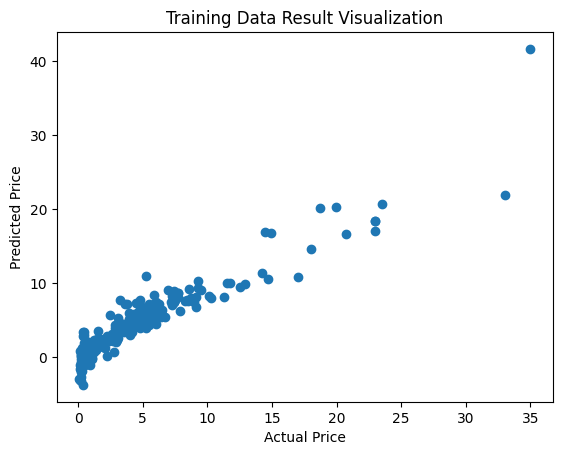

In [ ]:
plt.scatter(Y_train, train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training Data Result Visualization')
plt.show()

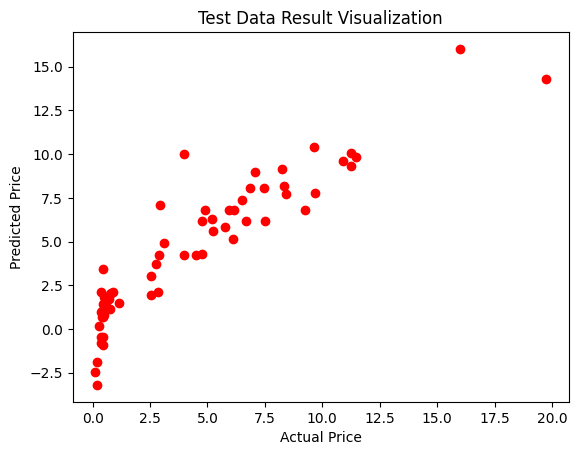

In [ ]:
plt.scatter(Y_test, test_prediction, c=['r',])
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Data Result Visualization')
plt.show()